In [32]:
# Load dữ liệu cận nặng, chiều cao của lớp K54KMT
import pandas as pd
data=pd.read_csv('data_science/k54kmt_01.csv',sep=';')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    33 non-null     object 
 1   lop     33 non-null     object 
 2   cao     33 non-null     int64  
 3   nang    33 non-null     float64
 4   gender  33 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ KB


,mssv,lop,cao,nang,gender
0,K185480106001,K54KMT.01,165,50.0,1
1,K185480106002,K54KMT.01,161,47.0,1
2,K185480106004,K54KMT.01,158,51.0,0
3,K185480106034,K54KMT.01,171,61.0,1
4,K185480106035,K54KMT.01,156,48.0,0


***Xây dựng model đoán chiều cao dựa vào cân nặng***

In [33]:
# tách dữ liệu CHieeuo cao là trục X
x_train=data['cao']
y_train=data['nang']
print('kích thước của x-train',x_train.shape)
print('kích thước của y-train',y_train.shape)

kích thước của x-train (33,)
kích thước của y-train (33,)


In [34]:
# khai báo model linear regession (hồi quy tuyến tính)
from sklearn.linear_model import LinearRegression as LR
model_ski=LR(fit_intercept=True) # Khai bao model tuyến tính có sử dụng hệ số b

In [35]:
# Training (huấn luyện) model => dạy model học cách đoán tương lai từ dữ liệu quá khứ
import numpy as np
X_train=x_train[:,np.newaxis]
print(X_train.shape)
model_ski.fit(X_train,y_train)

(33, 1)


C:\Users\admin\AppData\Local\Temp/ipykernel_19136/2485748102.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train=x_train[:,np.newaxis]


LinearRegression()

In [36]:
print('a=',model_ski.coef_)
print('b=',model_ski.intercept_)

a= [0.09444334]
b= 43.00119401997751


In [37]:
# Dùng model để đoán
#print('Ban có chiều cao bao nhiêu (cm)=')
#chieucao=input()
#chieucao=int(chieucao)
#can=model_ski.predict([[chieucao]])
#print(can)

In [38]:
# Lọc các dữ liệu nghi ngờ sai
du_doan=model_ski.predict(X_train)

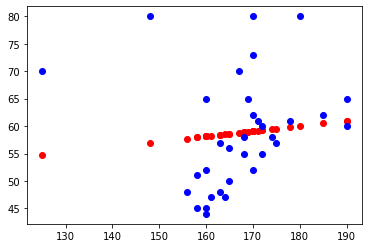

In [39]:
import matplotlib.pyplot as plt
plt.plot(X_train, du_doan,'ro')
plt.plot(X_train, y_train,'bo')

In [43]:
# tim sai số trung bình của mô  hình
error=(y_train-du_doan)**2
n=error.shape[0]
print(n)
error=np.sqrt(error.sum()/n)
print('e=',error)
print('y=',y_train)
print('du_doan=',du_doan)

33
e= 9.991025008620824
y= 0     50.00
1     47.00
2     51.00
3     61.00
4     48.00
5     58.00
6     62.00
7     60.00
8     80.00
9     57.00
10    58.00
11    47.00
12    52.00
13    44.00
14    62.00
15    69.95
16    80.00
17    45.00
18    45.00
19    60.00
20    56.00
21    57.00
22    55.00
23    52.00
24    80.00
25    61.00
26    55.00
27    70.00
28    65.00
29    73.00
30    48.00
31    65.00
32    65.00
Name: nang, dtype: float64
du_doan= [58.58434544 58.20657207 57.92324205 59.15100549 57.73435536 58.86767546
 60.47321228 59.24544883 59.05656215 58.39545876 59.43433552 58.4899021
 58.11212873 58.11212873 59.05656215 54.80661176 56.97880863 57.92324205
 58.11212873 60.94542899 58.58434544 59.52877886 59.24544883 59.05656215
 60.00099557 59.81210888 58.86767546 58.77323212 60.94542899 59.05656215
 58.39545876 58.96211881 58.11212873]


In [45]:
data['do_lech_so_voi_model']=np.abs(data['nang']-du_doan)
data.head()

,mssv,lop,cao,nang,gender,do_lech_so_voi_model
0,K185480106001,K54KMT.01,165,50.0,1,8.584345
1,K185480106002,K54KMT.01,161,47.0,1,11.206572
2,K185480106004,K54KMT.01,158,51.0,0,6.923242
3,K185480106034,K54KMT.01,171,61.0,1,1.848995
4,K185480106035,K54KMT.01,156,48.0,0,9.734355


In [47]:
nguong=1.5*error
nhung_ban_nghi_ngo=data[data['do_lech_so_voi_model']>nguong]
print(nhung_ban_nghi_ngo)

             mssv        lop  cao   nang  gender  do_lech_so_voi_model
8   K185480106008  K54KMT.01  170  80.00       1             20.943438
15  K185480106012  K54KMT.01  125  69.95       0             15.143388
16  K185480106038  K54KMT.01  148  80.00       1             23.021191
24  K185480106043  K54KMT.01  180  80.00       0             19.999004
